In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import skew, kurtosis
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import plotly.graph_objects as go2

### Load and Preprocess dataset

In [ ]:
df_path = '/content/drive/MyDrive/STAT/AMZN_Clean.csv'
# Load the CSV file, parse dates, and remove timezone
df = pd.read_csv(df_path, parse_dates=['Date'])
df['Date'] = df['Date'].dt.tz_localize(None)  # Remove timezone info
df.set_index('Date', inplace=True)

df

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2019-01-02,0,76.956497,76.956497,77.667999,73.046501,73.260002,159662000
2019-01-03,1,75.014000,75.014000,76.900002,74.855499,76.000504,139512000
2019-01-04,2,78.769501,78.769501,79.699997,75.915497,76.500000,183652000
2019-01-07,3,81.475502,81.475502,81.727997,79.459503,80.115501,159864000
2019-01-08,4,82.829002,82.829002,83.830498,80.830498,83.234497,177628000
...,...,...,...,...,...,...,...
2023-12-22,1253,153.419998,153.419998,154.350006,152.710007,153.770004,29480100
2023-12-26,1254,153.410004,153.410004,153.979996,153.029999,153.559998,25067200
2023-12-27,1255,153.339996,153.339996,154.779999,153.119995,153.559998,31434700


In [ ]:
filtered_df = df.loc['2023-9-01':'2024-12-31']
import plotly.graph_objects as go

# Assuming 'filtered_df' contains the data from 2021 to 2024
fig = go.Figure(data=[go.Candlestick(
    x=filtered_df.index,
    open=filtered_df['Open'],
    high=filtered_df['High'],
    low=filtered_df['Low'],
    close=filtered_df['Close']
)])

# Update layout with adjusted figure size
fig.update_layout(
    title="Candlestick Chart for Stock Prices (2021 - 2024)",
    xaxis_title="Date",
    yaxis_title="Price",
    xaxis_rangeslider_visible=True,  # Enable range slider
    width=1200,  # Adjust width
    height=600   # Adjust height
)

# Show the plot
fig.show()



### Visualize Close Price

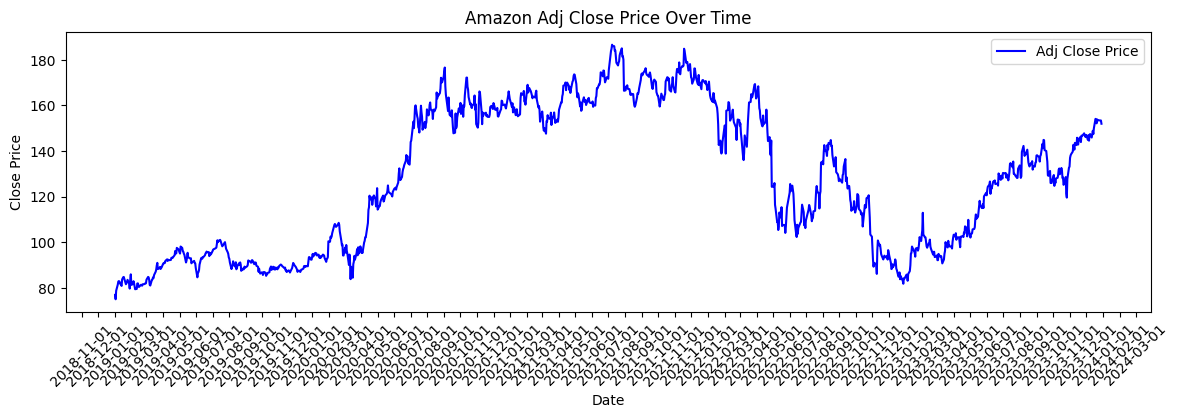

In [ ]:
# Plot Close Price and Volume
plt.figure(figsize=(14, 8))

# Close Price Over Time
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Adj Close'], label='Adj Close Price', color='blue')
# plt.plot(df.index, df['Close'], label='Close Price', color='red')
plt.title('Amazon Adj Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()


<Figure size 1400x800 with 0 Axes>

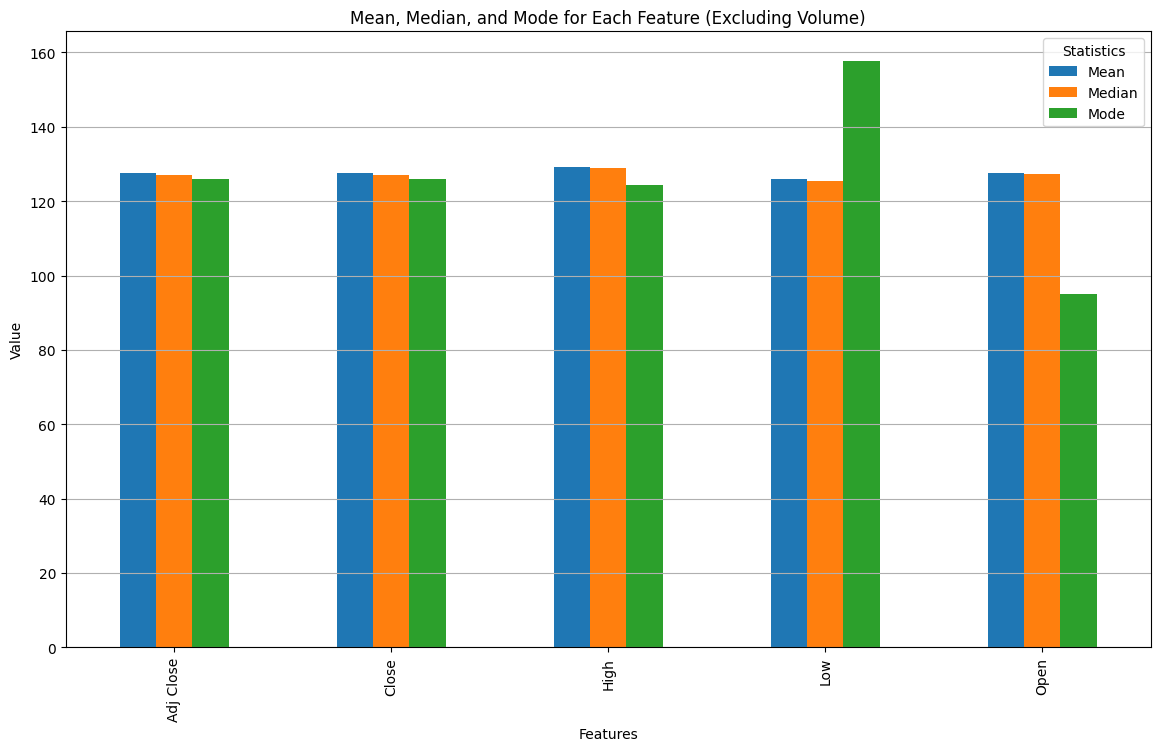

In [ ]:
# Calculate mean, median, and mode for each feature except 'Volume'
mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]  # Take the first mode for each column

# Combine the statistics into a DataFrame for easier plotting
summary_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values
})

# Drop the 'Volume' column from the summary DataFrame
summary_df = summary_df.drop('Volume', errors='ignore')
summary_df = summary_df.drop('Unnamed: 0', errors='ignore')

# Filter to only numeric columns (in case there are non-numeric columns in the dataset)
summary_df = summary_df.select_dtypes(include=['float64', 'int64'])

# Plot the statistics
plt.figure(figsize=(14, 8))

# Plot Mean, Median, and Mode for each feature excluding Volume
summary_df.plot(kind='bar', figsize=(14, 8))
plt.title('Mean, Median, and Mode for Each Feature (Excluding Volume)')
plt.xlabel('Features')
plt.ylabel('Value')
plt.legend(title='Statistics')
plt.grid(axis='y')

plt.show()


## Adj Close and Close

- The **mean**, **median**, and **mode** are very close to each other, indicating a **symmetrical distribution** for these features.
- Since **Adj Close** and **Close** are typically similar in value, this alignment suggests that there aren't many extreme outliers in these columns. The stock price is relatively stable around its average, with minor variations.

## High and Low

- Similar to **Adj Close** and **Close**, the **mean**, **median**, and **mode** for the **High** and **Low** prices are closely aligned.
- However, for the **Low** feature, the **mode** is slightly higher than the mean and median, indicating that the most frequently observed low prices are closer to the upper range within this distribution. This could imply a slight **positive skew** in the distribution for Low prices.

## Open

- For the **Open** feature, there is a noticeable difference between the mean, median, and mode.
- The **mode** is significantly lower than both the **mean** and **median**, suggesting a **positive skew** in the opening prices. This implies that while the majority of opening prices are on the lower end, there are some higher values that raise the average, likely due to occasional higher opening prices.


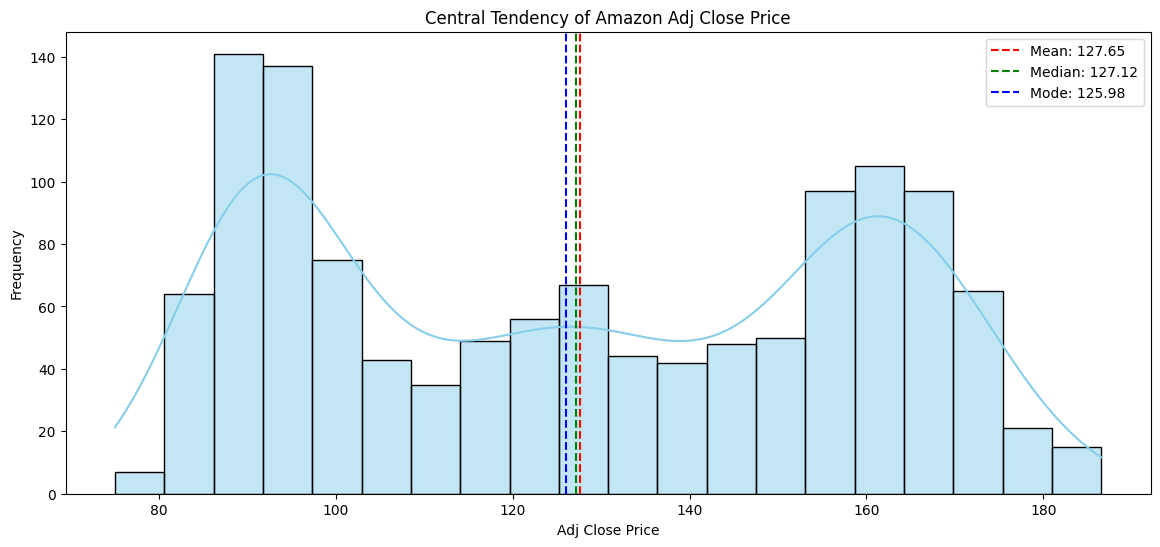

In [ ]:
plt.figure(figsize=(14, 6))

# Histogram with Mean and Median lines
sns.histplot(df['Close'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.axvline(df['Close'].mean(), color='red', linestyle='--', label=f'Mean: {df["Close"].mean():.2f}')
plt.axvline(df['Close'].median(), color='green', linestyle='--', label=f'Median: {df["Close"].median():.2f}')

# Display mode if it exists (some stock data may not have a meaningful mode in continuous values)
if not df['Close'].mode().empty:
    plt.axvline(df['Close'].mode()[0], color='blue', linestyle='--', label=f'Mode: {df["Close"].mode()[0]:.2f}')

plt.title('Central Tendency of Amazon Adj Close Price')
plt.xlabel('Adj Close Price')
plt.ylabel('Frequency')
plt.legend()

plt.show()

## Key Insights

### Bimodal Distribution
- The histogram appears to have **two peaks**, indicating a **bimodal distribution**. This could mean that there were two distinct periods or market conditions in the dataset where the **Close Price** clusters around two different ranges (around 90 and 160).
- This pattern could be due to major events, such as the **COVID-19 pandemic**, that significantly impacted Amazon’s stock price, creating two dominant price ranges.

### Mean, Median, and Mode Alignment
- The **mean** (127.65), **median** (127.12), and **mode** (125.98) are relatively close to each other, which indicates a **symmetrical distribution** around the central value of about 127.
- This alignment suggests that Amazon's stock price does not have extreme skewness, meaning it is fairly balanced around this central point, with minor fluctuations.

### Low Skewness
- Since the mean, median, and mode are closely aligned, there is **low skewness** in the dataset. This indicates that the stock price distribution is not heavily affected by extreme values or outliers.
- However, the bimodal nature suggests that while it is not skewed, the data may still reflect **two separate trading regimes** or **time periods**.

### Stock Price Stability
- The close proximity of mean, median, and mode around a central value suggests that Amazon’s stock price was relatively **stable** with minor deviations around the average, aside from the two clusters.
- This stability is often appealing to investors as it implies **predictability** in the stock’s performance.

### Potential Market Conditions
- The lower peak (around 90) and higher peak (around 160) might reflect changes due to external factors like **economic conditions** or **company performance**.
- For example, the lower peak might correspond to an earlier time period when the stock was priced lower, while the higher peak could indicate **growth periods**.


Dispersion Metrics for Amazon Close Price:
Range (Max - Min): 111.5564956665039
Variance: 974.0313343256685
Standard Deviation: 31.209475072895227
Q1 (25th Percentile): 95.44199943542482
Q3 (75th Percentile): 158.09374618530273
Interquartile Range (IQR): 62.651746749877915


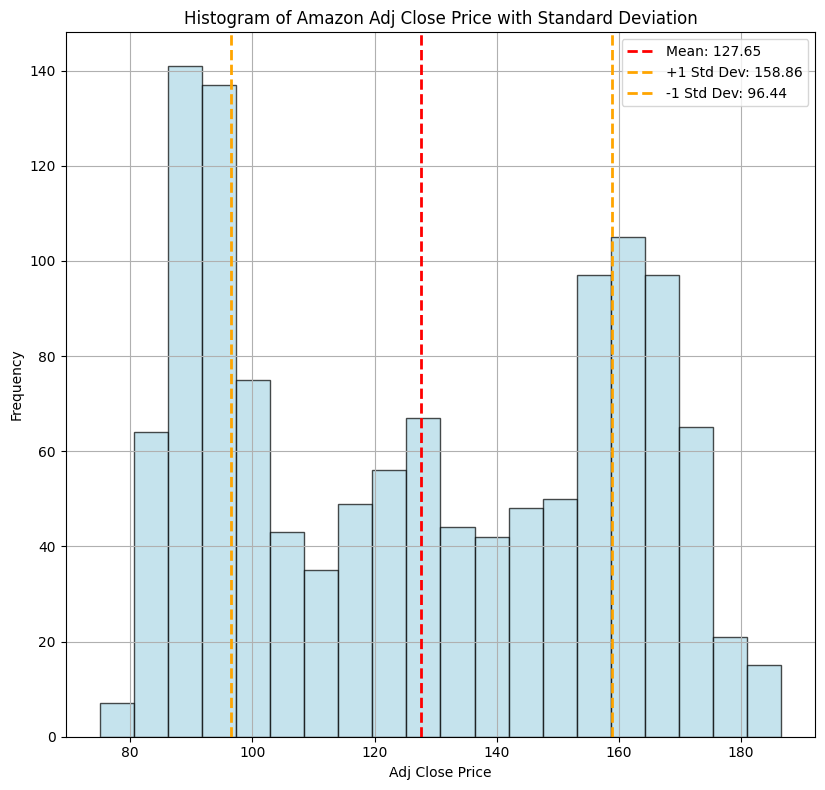

In [ ]:
price_range = df['Close'].max() - df['Close'].min()  # Range between max and min
variance = df['Close'].var()  # Variance
std_dev = df['Close'].std()  # Standard deviation

# Calculate Quartiles and Interquartile Range (IQR)
q1 = df['Close'].quantile(0.25)  # First quartile (25th percentile)
q3 = df['Close'].quantile(0.75)  # Third quartile (75th percentile)
iqr = q3 - q1  # Interquartile range

# Display Dispersion Metrics
print("Dispersion Metrics for Amazon Close Price:")
print(f"Range (Max - Min): {price_range}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"Q1 (25th Percentile): {q1}")
print(f"Q3 (75th Percentile): {q3}")
print(f"Interquartile Range (IQR): {iqr}")

plt.figure(figsize=(16, 8))

# Histogram of Close Price with Mean and Std Dev Annotations
plt.subplot(1, 2, 2)
plt.hist(df['Close'], bins=20, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(df['Close'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {df["Close"].mean():.2f}')
plt.axvline(df['Close'].mean() + std_dev, color='orange', linestyle='dashed', linewidth=2, label=f'+1 Std Dev: {df["Close"].mean() + std_dev:.2f}')
plt.axvline(df['Close'].mean() - std_dev, color='orange', linestyle='dashed', linewidth=2, label=f'-1 Std Dev: {df["Close"].mean() - std_dev:.2f}')
plt.title('Histogram of Amazon Adj Close Price with Standard Deviation')
plt.xlabel('Adj Close Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


%%markdown
# Dispersion Analysis Insights for Amazon Close Price

### 1. Range (Max - Min): 111.56
The range of 111.56 reflects the difference between the highest and lowest observed close prices in the dataset.  
This wide range suggests that Amazon's stock experienced significant fluctuations in value over the analyzed period, indicating high volatility.  
A large range can mean that the stock was impacted by major market events or internal factors affecting Amazon’s performance, leading to sharp ups and downs in the price.

### 2. Variance: 974.03
Variance quantifies how much the Close Prices vary around the mean. The high variance of 974.03 indicates a substantial spread in the data.  
A higher variance points to greater deviation from the mean, meaning the stock price did not stay close to the average but varied widely.  
This variability may appeal to traders looking to profit from short-term price movements but could indicate a riskier investment for conservative, long-term investors.

### 3. Standard Deviation: 31.21
Standard Deviation provides a measure of the average deviation of prices from the mean. Here, the standard deviation of 31.21 suggests that the Close Price typically varies by about 31 points from the mean price.  
This relatively high standard deviation reinforces the idea of volatility, showing that the stock frequently experienced price movements of significant magnitude.  
For investors, a high standard deviation indicates unpredictability, with both opportunities and risks. Higher standard deviations often correlate with higher risk, which might be attractive to risk-seeking traders but concerning to more conservative investors.

### 4. First Quartile (Q1): 95.44 and Third Quartile (Q3): 158.09
Q1 (25th Percentile) and Q3 (75th Percentile) provide insights into where the majority of prices lie within the distribution.  
Q1 = 95.44 means that 25% of the Close Prices are below this value, while Q3 = 158.09 means that 75% of the prices are below this value.  
The fact that Q3 is relatively high indicates that a substantial portion of the Close Prices are skewed towards the upper end of the range, with 75% of prices falling between approximately 95 and 158.

### 5. Interquartile Range (IQR): 62.65
The IQR (Q3 - Q1) measures the range within which the middle 50% of the data lies, here spanning 62.65 points.  
A large IQR like this suggests that Amazon's stock had a broad distribution of values, without being tightly clustered around a central price point.  
This spread implies that prices did not concentrate around a single range but varied widely, likely influenced by market fluctuations or external factors.  
A broader IQR is often associated with higher volatility and indicates that the stock’s price had significant variation even within the middle 50% of the dataset.


Skewness of Close Price: 0.05839424506043029
Kurtosis of Close Price: -1.4680632771080115


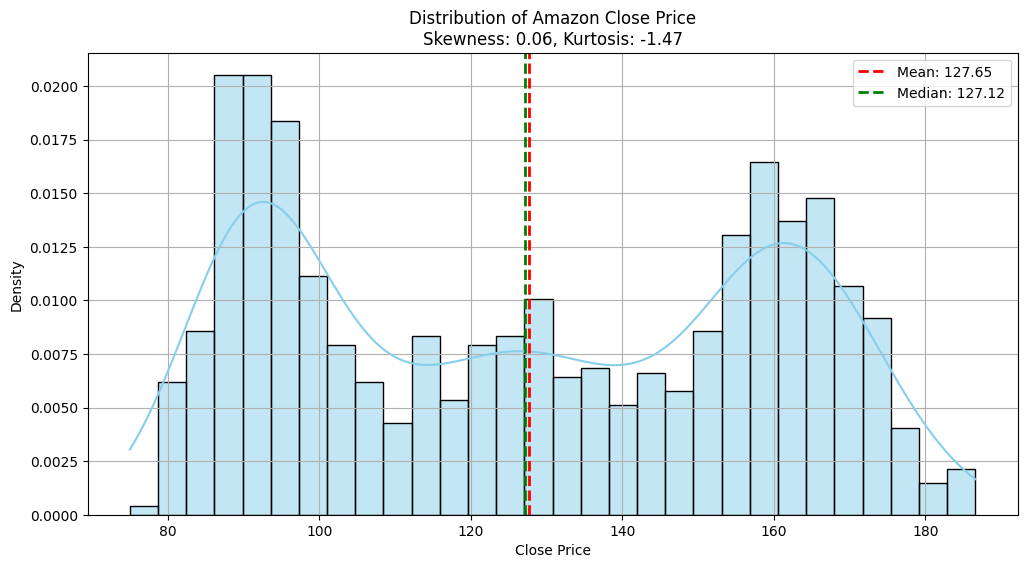

In [ ]:
close_skewness = skew(df['Close'])
close_kurtosis = kurtosis(df['Close'])

# Display skewness and kurtosis values
print(f"Skewness of Close Price: {close_skewness}")
print(f"Kurtosis of Close Price: {close_kurtosis}")

# Plot histogram with density plot
plt.figure(figsize=(12, 6))
sns.histplot(df['Close'], bins=30, kde=True, color='skyblue', edgecolor='black', stat="density")
plt.axvline(df['Close'].mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {df['Close'].mean():.2f}")
plt.axvline(df['Close'].median(), color='green', linestyle='dashed', linewidth=2, label=f"Median: {df['Close'].median():.2f}")

# Display skewness and kurtosis information on the plot
plt.title(f"Distribution of Amazon Close Price\nSkewness: {close_skewness:.2f}, Kurtosis: {close_kurtosis:.2f}")
plt.xlabel("Close Price")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

## Long-Term Trend (200-Day Moving Average)

- The **200-Day Moving Average** (orange line) reflects the overall long-term trend in Amazon's stock price.
- From **2019 to 2021**, the 200-Day MA shows a strong upward trend, which aligns with the period when Amazon experienced significant growth, likely due to increased demand for e-commerce during the pandemic.
- In **2022**, the 200-Day MA begins to flatten and then decline, indicating a shift to a bearish long-term trend. This might correspond to a cooling period for Amazon’s growth or broader economic factors impacting the stock market.
- By the **end of 2023**, the 200-Day MA appears to be stabilizing, suggesting a potential bottoming-out or leveling-off of the long-term downtrend.

## Medium-Term Trend (30-Day Moving Average)

- The **30-Day Moving Average** (green line) is more responsive to monthly price changes and provides a view of the medium-term trend.
- Throughout **2020 and early 2021**, the 30-Day MA closely follows the monthly close price, showing rapid upward movement, which indicates strong momentum in Amazon’s stock price.
- In **late 2021 and 2022**, the 30-Day MA dips below the 200-Day MA, which indicates a **bearish phase**. This crossover signals that the medium-term trend has turned downward, reflecting a correction or decrease in price momentum.
- Starting in **early 2023**, the 30-Day MA shows signs of recovery, moving upward and closing the gap with the 200-Day MA. This could indicate a potential reversal or recovery phase in Amazon’s stock price.

## Crossovers and Trend Reversals

- When the **30-Day MA crosses above the 200-Day MA** (a "golden cross"), it’s often seen as a **bullish signal** indicating a potential upward trend. However, we don’t see a golden cross in this chart yet, although the gap between the two moving averages narrows in 2023.
- When the **30-Day MA crosses below the 200-Day MA** (a "death cross"), it’s typically a **bearish signal**. This happens in **late 2021**, aligning with the start of a downtrend in Amazon’s stock price through 2022.

## Volatility and Momentum

- The **monthly close price** (blue line) shows considerable volatility, especially during **2020-2021**, with sharp increases in price. This period of rapid growth may be due to Amazon’s significant gains as consumers shifted to online shopping.
- In **2022**, the monthly close price declines more steeply, showing a loss of momentum and increased volatility in Amazon’s stock performance.

## Recovery Signals

- In **2023**, the monthly close price and the 30-Day MA start to trend upward again, suggesting a potential recovery or stabilization after a bearish phase.
- This movement, along with the narrowing gap between the 30-Day and 200-Day MAs, could indicate that Amazon’s stock is entering a period of renewed positive momentum.

## Summary

- **Uptrend Phase (2020-2021)**: Both the 30-Day and 200-Day MAs move upward, with the 30-Day above the 200-Day, reflecting strong positive momentum.
- **Downtrend Phase (2022)**: The 30-Day MA crosses below the 200-Day MA, signaling a bearish trend, which is confirmed by the falling 200-Day MA.
- **Stabilization and Recovery (2023)**: The 30-Day MA begins to rise, and the gap with the 200-Day MA narrows, indicating a potential reversal or recovery.


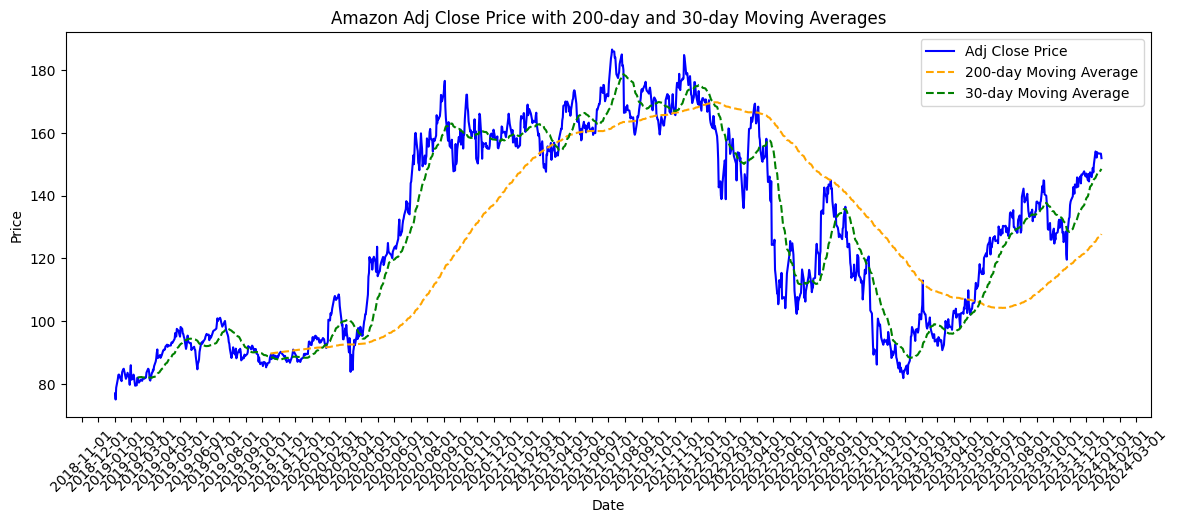

In [ ]:
# Calculate Moving Averages
df['200_day_MA'] = df['Close'].rolling(window=200).mean()
df['30_day_MA'] = df['Close'].rolling(window=30).mean()

# Plot Close Price with 7-day and 30-day Moving Averages and Daily Returns
plt.figure(figsize=(14, 5))

# Plot Close Price and Moving Averages
plt.plot(df.index, df['Close'], label='Adj Close Price', color='blue')
plt.plot(df.index, df['200_day_MA'], label='200-day Moving Average', linestyle='--', color='orange')
plt.plot(df.index, df['30_day_MA'], label='30-day Moving Average', linestyle='--', color='green')
plt.title('Amazon Adj Close Price with 200-day and 30-day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

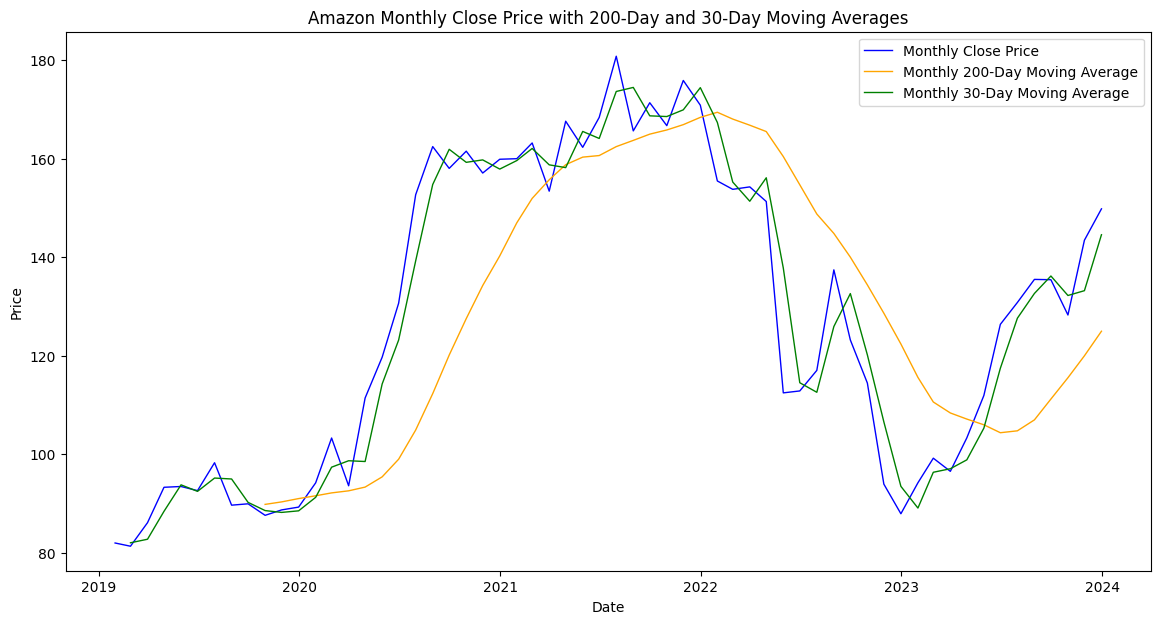

In [ ]:

# Calculate Moving Averages
df['200-Day MA'] = df['Close'].rolling(window=200).mean()
df['30-Day MA'] = df['Close'].rolling(window=30).mean()

# Resample data by month, taking the mean of each month
monthly_df = df.resample('M').mean()

# Visualize the Monthly Close Price with Monthly Moving Averages
plt.figure(figsize=(14, 7))

# Plot original Monthly Close Price
plt.plot(monthly_df.index, monthly_df['Close'], label='Monthly Close Price', color='blue', linewidth=1)

# Plot Monthly 200-Day Moving Average
plt.plot(monthly_df.index, monthly_df['200-Day MA'], label='Monthly 200-Day Moving Average', color='orange', linewidth=1)

# Plot Monthly 30-Day Moving Average
plt.plot(monthly_df.index, monthly_df['30-Day MA'], label='Monthly 30-Day Moving Average', color='green', linewidth=1)

# Add title and labels
plt.title('Amazon Monthly Close Price with 200-Day and 30-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Display the plot
plt.show()


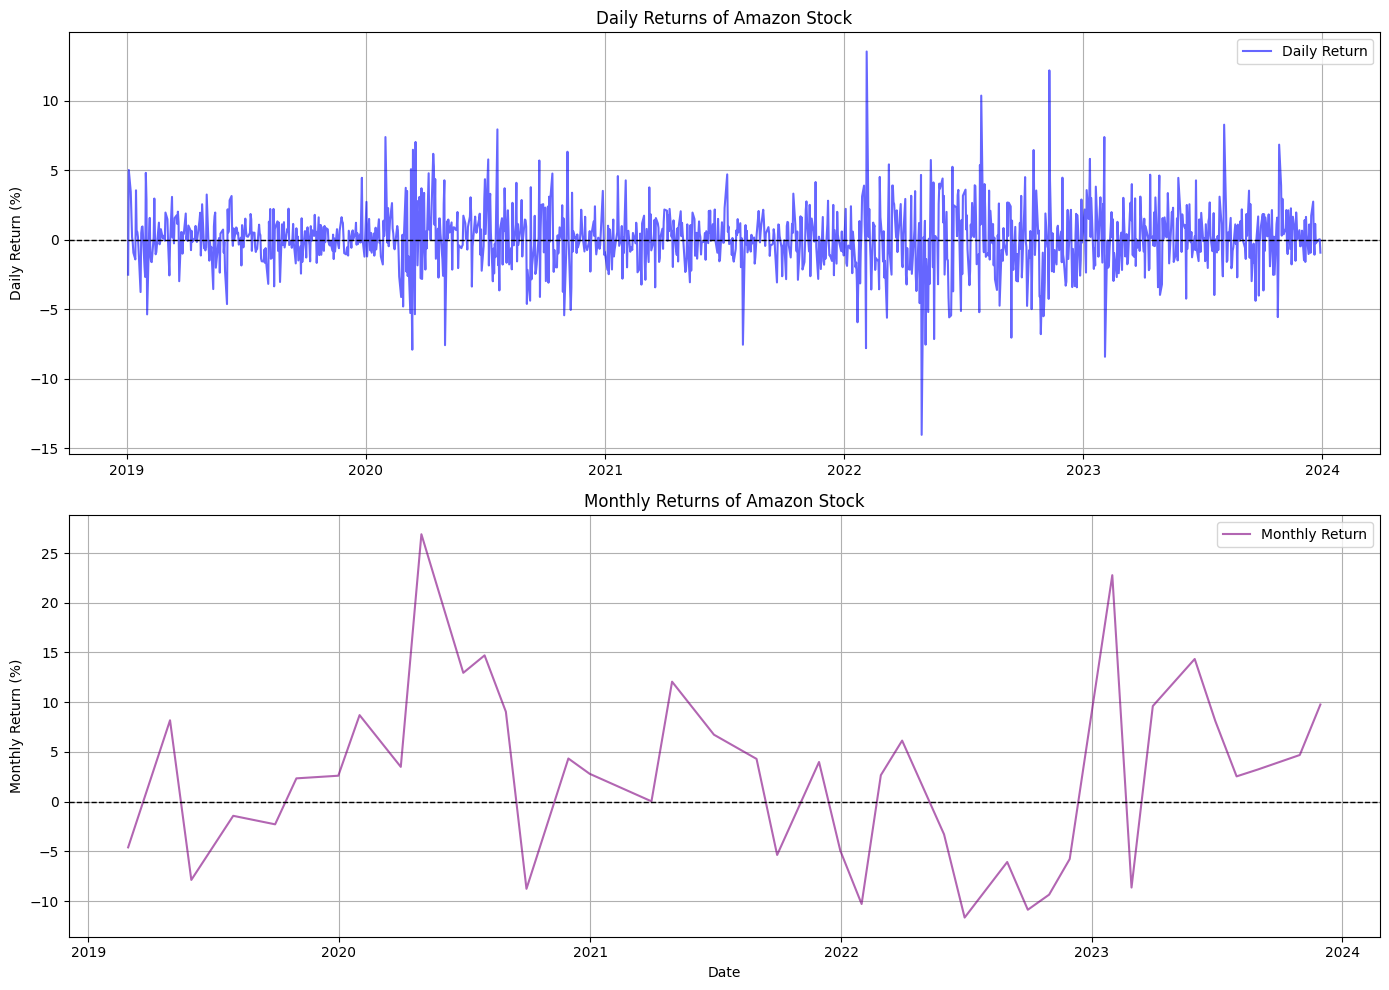

In [ ]:
# Calculate Daily and Monthly Returns
df['Daily Return'] = df['Close'].pct_change() * 100  # Daily returns in percentage
df['Monthly Return'] = df['Close'].resample('M').ffill().pct_change() * 100  # Monthly returns in percentage

# Drop NaN values that result from percentage change calculation
daily_returns = df['Daily Return'].dropna()
monthly_returns = df['Monthly Return'].dropna()

# Visualization of Daily and Monthly Returns
plt.figure(figsize=(14, 10))

# Plot Daily Returns
plt.subplot(2, 1, 1)
plt.plot(daily_returns.index, daily_returns, color='blue', alpha=0.6, label='Daily Return')
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.title('Daily Returns of Amazon Stock')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)

# Plot Monthly Returns
plt.subplot(2, 1, 2)
plt.plot(monthly_returns.index, monthly_returns, color='purple', alpha=0.6, label='Monthly Return')
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.title('Monthly Returns of Amazon Stock')
plt.xlabel('Date')
plt.ylabel('Monthly Return (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Daily Returns
**High Volatility**:
- The daily returns chart shows frequent fluctuations around the 0% line, indicating regular daily price volatility.
- There are noticeable spikes (both positive and negative), especially around early 2022. These spikes may correspond to significant market events, earnings announcements, or economic shifts affecting Amazon’s stock price.

**Risk and Opportunity for Traders**:
- Active traders could find opportunities in this daily volatility, as it allows for short-term trading strategies to capitalize on frequent price changes.
- However, the sharp negative spikes also indicate risks, as sudden drops could lead to substantial losses for short-term positions.

**Stable Patterns Over Time**:
- Although the stock experiences daily volatility, it appears somewhat stable in frequency and magnitude outside of major events. Daily fluctuations mostly range between -5% to +5%, except for a few extreme cases.

### Monthly Returns
**Longer-Term Trends**:
- The monthly returns chart provides a smoother view, showing more prolonged periods of positive or negative returns.
- There’s a noticeable peak in early 2020, likely coinciding with the start of the COVID-19 pandemic, when Amazon experienced a surge due to increased demand for online shopping.

**Divergent Phases**:
- There are distinct phases in the monthly returns, with a sharp increase around 2020, followed by a gradual decline in 2021 and early 2022. This could suggest a period of strong growth followed by a correction phase as the market adjusted to post-pandemic conditions.
- Another positive peak in early 2023 might indicate a recovery or renewed interest in Amazon's stock, possibly due to favorable market conditions or strategic shifts within the company.

**Negative Returns Periods**:
- The downward trend in 2021 and 2022 shows consecutive months of negative returns, suggesting that Amazon’s stock faced challenges or market headwinds during this time.
- Prolonged negative returns may concern long-term investors, as they reflect periods when the stock consistently underperformed.


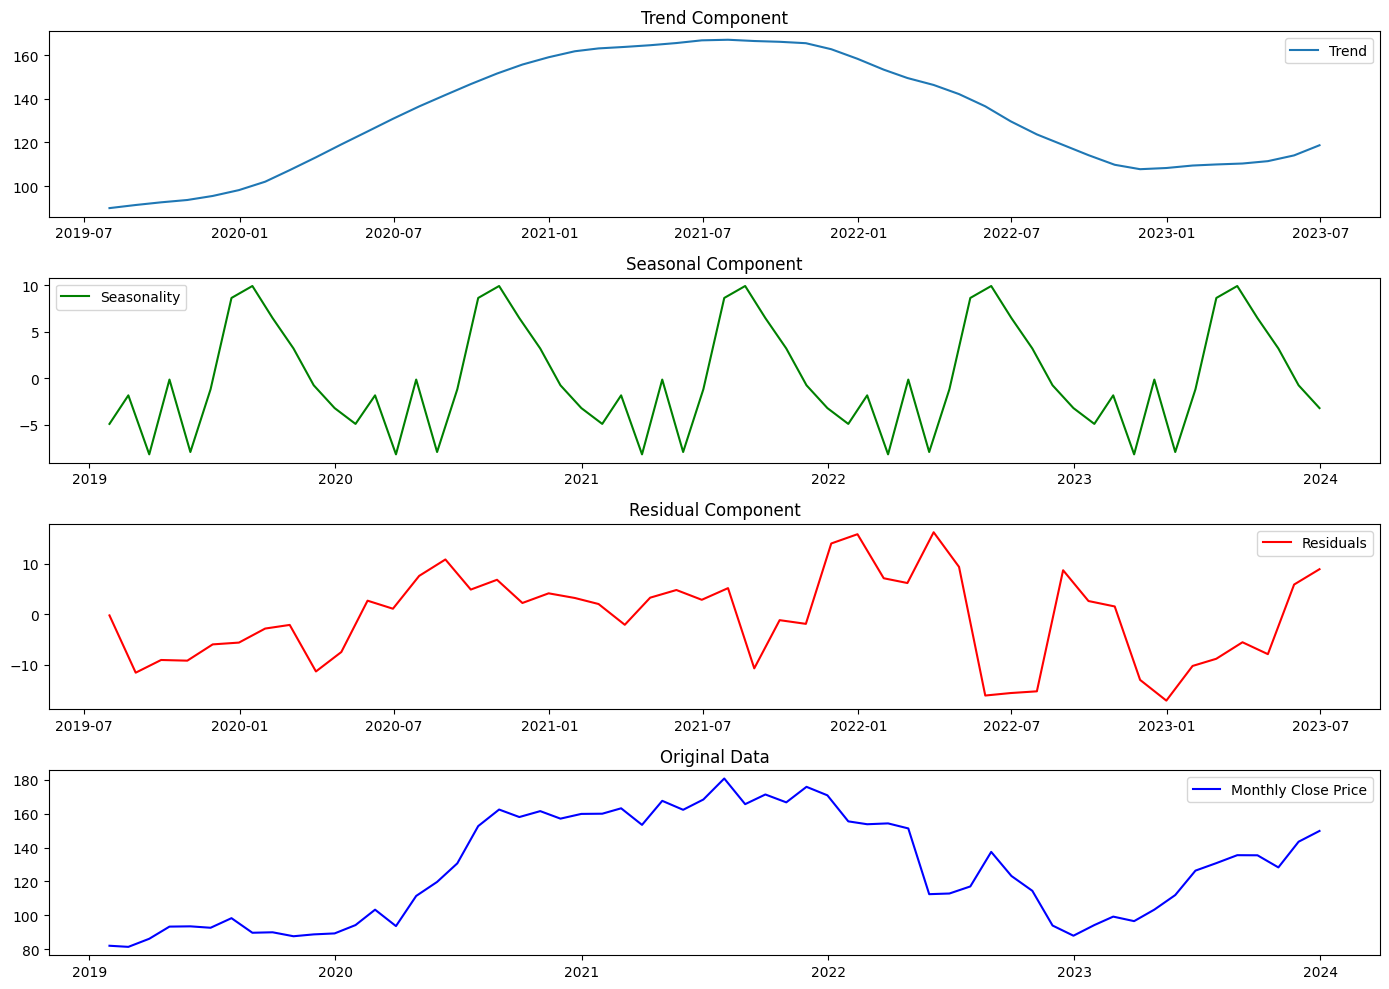

In [ ]:
# Ensure the data is in monthly frequency for quarterly trend analysis
# If daily data, resample to monthly
monthly_data = df['Close'].resample('M').mean()

# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_data, model='additive', period=12)

# Plot the decomposition components
plt.figure(figsize=(14, 10))

# Trend component
plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend Component')
plt.legend()

# Seasonal component
plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component')
plt.legend()

# Residual component
plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residual Component')
plt.legend()

# Original data for reference
plt.subplot(4, 1, 4)
plt.plot(monthly_data, label='Monthly Close Price', color='blue')
plt.title('Original Data')
plt.legend()

plt.tight_layout()
plt.show()


## 1. Trend Component
- The trend component shows the long-term movement of Amazon’s stock price.
- From 2019 to mid-2021, there was a strong upward trend, likely reflecting growth in Amazon's business during the COVID-19 pandemic when demand for online services increased.
- However, from mid-2021 onwards, the trend shifts downward, indicating a decline in stock price. This could be due to market adjustments post-pandemic or economic headwinds impacting Amazon’s valuation.
- Recently, at the beginning of 2023, the trend shows signs of stabilizing, suggesting a potential bottoming-out and possibly the start of a recovery phase.

## 2. Seasonal Component
- The seasonal component shows recurring patterns, likely on an annual cycle.
- Peaks and troughs in the seasonal component repeat around the same months each year, suggesting that Amazon’s stock price may experience cyclical changes related to specific times of the year.
- This could be due to factors like increased sales during holiday seasons (e.g., Q4 holiday shopping) and slower periods in other quarters.
- The cyclical nature here is important for understanding investor behavior and potential trading opportunities around predictable seasonal patterns.

## 3. Residual Component
- The residual component represents random noise, which includes fluctuations that cannot be attributed to the trend or seasonality.
- Significant spikes in the residual component suggest that there were unexpected events affecting Amazon’s stock price, such as earnings announcements, macroeconomic shifts, or company-specific news.
- The heightened residuals around 2021 and early 2022 may reflect volatility from post-pandemic adjustments, economic uncertainties, or changes in consumer behavior.

## 4. Original Data
- The original data provides a complete view of Amazon’s monthly close prices and shows the combined effects of trend, seasonality, and residuals.
- Observing the original data along with the other components gives a clearer view of how Amazon’s stock price moved over time.

## Overall Insights
- **Growth and Decline Cycles**: The trend component indicates a period of growth followed by a downturn, which aligns with external factors (e.g., pandemic, economic shifts).
- **Seasonal Cycles**: The seasonal component suggests that Amazon’s stock experiences regular patterns throughout the year, likely driven by predictable business cycles and investor behav


In [ ]:

covid_df_path = '/content/drive/MyDrive/STAT/sum_confirmed.csv'
covid_df = pd.read_csv(covid_df_path, parse_dates=['Date'])
covid_df.set_index('Date', inplace=True)
covid_df

,Case
Date,
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5
...,...
2022-04-12,80477797
2022-04-13,80514639
2022-04-14,80573532


Plotting Covid-19 total case from 2020-2022

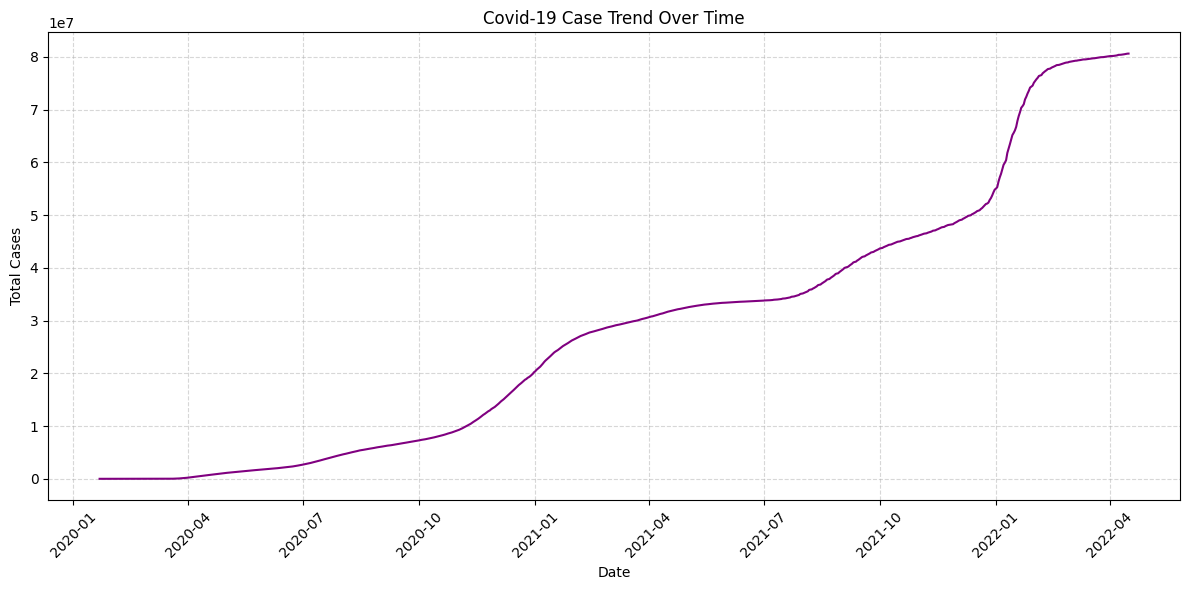

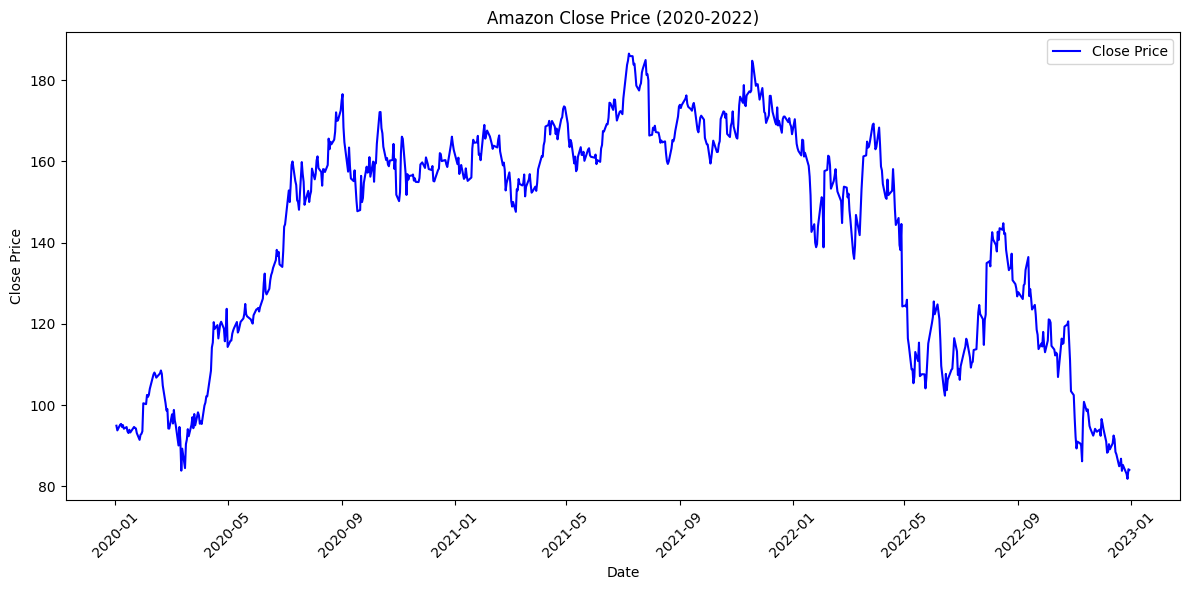

In [ ]:
# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(covid_df.index, covid_df["Case"], color="purple", linewidth=1.5)
plt.title("Covid-19 Case Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

df_filtered = df[(df.index >= '2020-01-01') & (df.index <= '2022-12-31')]

# Plot the Close price over time
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Close'], color='blue', label='Close Price')
plt.title('Amazon Close Price (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mean: 28141140.528186273
Median: 29026450.0
Mode: 16


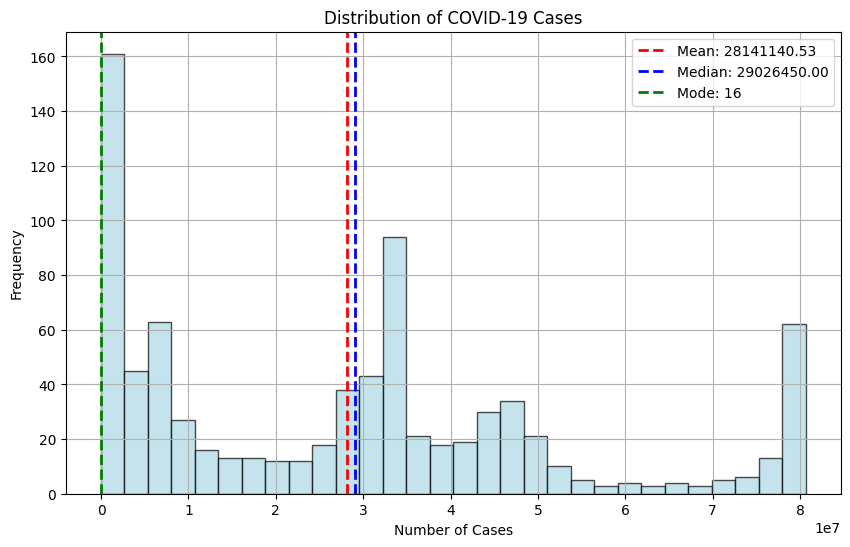

In [ ]:
# Calculate mean, median, and mode
mean_value = covid_df['Case'].mean()
median_value = covid_df['Case'].median()
mode_value = covid_df['Case'].mode()[0]  # Mode might return multiple values, so we take the first one

# Display the calculated values
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")

# Visualization
plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(covid_df['Case'], bins=30, color='lightblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='green', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value}')

plt.title('Distribution of COVID-19 Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
